# `deeplabcut/pose_estimation_pytorch/solvers/utils.py` 
has the ff functions:
1. get_dlc_scorer
2. get_evaluation_folder
3. get_model_folder
4. get_result_filename
5. get_model_path
6. get_detector_path
7. sort_paths
8. save_predictions
9. get_paths
10. get_results_filename

### Overall formatting:
1. Lacks docstrings esp. on parameters
2. Parameter type definition was only done in some functions

### get_evaluation_folder
Does not include testing for validity of path before folder creation

### get_model_folder
Does not include testing for validity of path before folder creation

### get_detector_path
Does not include testing for validity of path before returning generated path to user

### get_model_path
Does not include testing for validity of path before returning generated path to user

### sort_paths()
In its original state, it failed the following test cases:
1. paths not following snapshot-epoch_number.pt -> should be ignored with a warning issued
2. path/to/snapshot5-10.pt -> must be ignored with a warning issued
3. path/to/snapshot-10.weights -> must be ignored with a warning issued


## New additions:
1. get_dlc_scorer
2. get_evaluation_folder
3. get_model_folder
4. get_result_filename
5. get_model_path
6. get_detector_path
7. sort_paths
8. save_predictions
9. get_paths
10. get_results_filename
11. verify_paths *<-- new!*

### Overall formatting:
🟢 Added docstrings to functions
🟢 Google-format reformatted the whole code


### get_evaluation_folder 
🟢 Added file path testing if path already exists before folder creation

In [ ]:
def get_evaluation_folder(train_fraction, shuffle, model_prefix, test_cfg):
    evaluation_folder = os.path.join(
        test_cfg["project_path"],
        str(
            deeplabcut_auxiliaryfunctions.GetEvaluationFolder(
                train_fraction, shuffle, test_cfg, modelprefix=model_prefix)),
    )
    if not os.path.exists(evaluation_folder):
        deeplabcut_pose_estimation_pytorch_utils.create_folder(
            evaluation_folder)
    else:
        raise FileExistsError(
            "Cannot create a new folder because %e already exists." %
            evaluation_folder)

    return evaluation_folder

#### Comment:
1. (Quentin: 6 July) No need to handle `FileExistsError` because `deeplabcut_pose_estimation_pytorch_utils.create_folder` already handles this case.
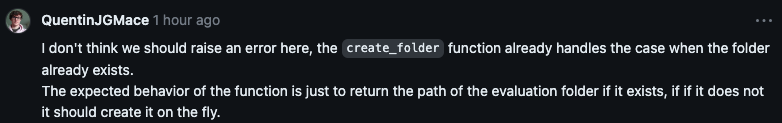

### get_model_folder
🟢 Added file path testing if path already exists before folder creation

In [ ]:
def get_model_folder(train_fraction, shuffle, model_prefix, test_cfg):
    model_folder = os.path.join(
        test_cfg["project_path"],
        str(
            deeplabcut_auxiliaryfunctions.GetModelFolder(
                train_fraction, shuffle, test_cfg, modelprefix=model_prefix)),
    )
    if not os.path.exists(model_folder):
        deeplabcut_pose_estimation_pytorch_utils.create_folder(model_folder)
    else:
        raise FileExistsError(
            "Cannot create a new folder because %e already exists." %
            model_folder)
    return model_folder

#### Comment:
1. (Quentin: 6 July) No need to handle `FileExistsError` because `deeplabcut_pose_estimation_pytorch_utils.create_folder` already handles this case.

### get_detector_path
🟢 Added file path testing if path does not exist before returning path to user

In [ ]:
def get_detector_path(model_folder: str, load_epoch: int):
    detector_paths = glob.glob(f"{model_folder}/train/detector-snapshot*")
    sorted_paths = sort_paths(detector_paths,
                              r"^(.*)?detector-snapshot-(\d+)\.pt$")
    detector_path = sorted_paths[load_epoch]
    if not os.path.exists(detector_path):
        raise FileNotFoundError("Path %e does not exist." % detector_path)
    return detector_path

### get_model_path
🟢 Added file path testing if path does not exist before returning path to user

In [ ]:
def get_model_path(model_folder: str, load_epoch: int):
    model_paths = glob.glob(f'{model_folder}/train/snapshot*')
    sorted_paths = sort_paths(model_paths)
    model_path = sorted_paths[load_epoch]
    if not os.path.exists(model_path):
        raise FileNotFoundError("Path %e does not exist." % model_path)
    return model_path

### sort_paths
🟢 Revised this function so it can now handle the ff across different OS:
1. paths not following snapshot-epoch_number.pt -> should be ignored with a warning issued
2. path/to/snapshot5-10.pt -> must be ignored with a warning issued
3. path/to/snapshot-10.weights -> must be ignored with a warning issued

In [ ]:
def sort_paths(paths: list[str],
               pattern: str = r"^(.*)?snapshot-(\d+)\.pt$") -> list[str]:
    '''
    Sorts a list of paths following a specific regular expression pattern. 
    Default pattern for each path in list: path/to/snapshot-epoch_number.pt
    Returns: A list of sorted paths according to epoch number.
    
    Input restrictions:
        Only accepts paths that end in snapshot-epoch_number.pt
            Paths not following this format will be ignored, not included in the list of paths sorted, and a warning will be issued providing the list of invalid paths

            Examples:
                1)  Input: paths = ["path/to/snapshot-5.pt","path/to/snapshot-1.pt"]
                    Output: sorted_paths = ["path/to/snapshot-1.pt","path/to/snapshot-5.pt"]

                2)  Input: paths = ["path/to/snapshots-5.pt","path/to/snapshot-1.pt"]
                    Output: sorted_paths = ["path/to/snapshot-1.pt"]
                            Warning: "Invalid paths found and ignored: path/to/snapshots-5.pt"
                3)  Input: paths = ["path\\to\\snapshot-5.pt","path\\to\\snapshot-1.pt"]
                    Output: sorted_paths = ["path\\to\\snapshot-1.pt","path\\to\\snapshot-5.pt"]

                3)  Input: paths = paths = ["path/to/snapshot-5.weights","path/to/snapshot-1.pt"]
                    Output: sorted_paths = ["path/to/snapshot-1.pt"]
                            Warning: "Invalid paths found and ignored: path/to/snapshots-5.weights"
    '''
    verified_paths = verify_paths(paths, pattern)
    sorted_paths = sorted(verified_paths,
                          key=lambda i: int(re.match(pattern, i).group(2)))
    return sorted_paths

### 🟢 verify_paths
Added this new function that verifies the input list of string paths are valid based on the input regular expression pattern. Returns only the list of valid paths. Throws a warning if there is an invalid path in the input list.

In [ ]:
def verify_paths(paths: list[str], pattern: str):
    '''
    Verifies the input list of string paths if it follows the regular expression pattern. 
    Returns: A list of only valid paths. Also throws a warning for invalid paths.
    '''
    valid_paths = [x for x in paths if re.match(pattern, x)]
    invalid_paths = [x for x in paths if x not in valid_paths]

    if len(invalid_paths) > 0:
        warnings.warn("Invalid paths found and ignored:" +
                      ",".join(invalid_paths))

    return valid_paths

# 🟢`tests/pose_estimation_pytorch_solvers_utils.py` 
has the ff test functions:
1. test_sort_model_paths
2. test_sort_detector_paths

### 🟢 test_sort_model_paths

In [ ]:
test_data = [([
    "/path/to/snapshot-100.pt", "/path/to/snapshot-10.pt",
    "/path/to/snapshot-5.pt", "/path/to/snapshot-50.pt"
], [
    "/path/to/snapshot-5.pt", "/path/to/snapshot-10.pt",
    "/path/to/snapshot-50.pt", "/path/to/snapshot-100.pt"
]),
             ([
                 "/path/to/snapshot-100.pt",
                 "/path/to/snapshot-10.pt",
                 "/path/to/snapshot-5.pt",
                 "/path/to/snapshot-50.pt",
                 "/path/to/snapshot5-50.pt",
                 "/path/to/snapshot1-00.pt",
             ], [
                 "/path/to/snapshot-5.pt", "/path/to/snapshot-10.pt",
                 "/path/to/snapshot-50.pt", "/path/to/snapshot-100.pt"
             ]),
             ([
                 "\\path\\to\\snapshot-100.pt",
                 "\\path\\to\\snapshot-10.pt",
                 "\\path\\to\\snapshot-5.pt",
                 "\\path\\to\\snapshot-50.pt",
                 "\\path\\to\\snapshot5-50.pt",
                 "\\path\\to\\snapshot1-00.pt",
             ], [
                 "\\path\\to\\snapshot-5.pt", "\\path\\to\\snapshot-10.pt",
                 "\\path\\to\\snapshot-50.pt", "\\path\\to\\snapshot-100.pt"
             ]),
             ([
                 "\path\to\snapshot-100.pt",
                 "\path\to\snapshot-10.pt",
                 "\path\to\snapshot-5.pt",
                 "\path\to\snapshot-50.pt",
                 "\path\to\snapshot5-50.pt",
                 "\path\to\snapshot1-00.pt",
             ], [
                 "\path\to\snapshot-5.pt", "\path\to\snapshot-10.pt",
                 "\path\to\snapshot-50.pt", "\path\to\snapshot-100.pt"
             ]),
             ([
                 "C:\\path\\to\\snapshot-100.pt",
                 "C:\\path\\to\\snapshot-10.pt",
                 "C:\\path\\to\\snapshot-5.pt",
                 "C:\\path\\to\\snapshot-50.pt",
                 "C:\\path\\to\\snapshot5-50.pt",
                 "C:\\path\\to\\snapshot1-00.pt",
             ], [
                 "C:\\path\\to\\snapshot-5.pt", "C:\\path\\to\\snapshot-10.pt",
                 "C:\\path\\to\\snapshot-50.pt",
                 "C:\\path\\to\\snapshot-100.pt"
             ]),
             ([
                 "C:\path\to\snapshot-100.pt",
                 "C:\path\to\snapshot-10.pt",
                 "C:\path\to\snapshot-5.pt",
                 "C:\path\to\snapshot-50.pt",
                 "C:\path\to\snapshot5-50.pt",
                 "C:\path\to\snapshot1-00.pt",
             ], [
                 "C:\path\to\snapshot-5.pt", "C:\path\to\snapshot-10.pt",
                 "C:\path\to\snapshot-50.pt", "C:\path\to\snapshot-100.pt"
             ])]


@pytest.mark.parametrize("paths,expected_sorted_paths", test_data)
def test_sort_model_paths(paths, expected_sorted_paths):
    sorted_paths = deeplabcut_pytorch_pose_utils.sort_paths(paths)
    assert sorted_paths == expected_sorted_paths
    with pytest.warns(UserWarning):
        deeplabcut_pytorch_pose_utils.sort_paths([
            "/path/to/snapshot5-10.pt", "/path/to/snapshot5-10.pth",
            "/path/to/snapshot-10.pt (2)", "/path/to/snapshot-10 (2).pt"
        ])

### 🟢 test_sort_detector_paths

In [ ]:
test_data = [
    ([
        "/path/to/detector-snapshot-100.pt",
        "/path/to/detector-snapshot-10.pt", "/path/to/detector-snapshot-5.pt",
        "/path/to/detector-snapshot-50.pt"
    ], [
        "/path/to/detector-snapshot-5.pt", "/path/to/detector-snapshot-10.pt",
        "/path/to/detector-snapshot-50.pt", "/path/to/detector-snapshot-100.pt"
    ]),
    ([
        "/path/to/detector-snapshot-100.pt",
        "/path/to/detector-snapshot-10.pt",
        "/path/to/detector-snapshot-5.pt",
        "/path/to/detector-snapshot-50.pt",
        "/path/to/detector-snapshot5-50.pt",
        "/path/to/snapshot1-00.pt",
    ], [
        "/path/to/detector-snapshot-5.pt", "/path/to/detector-snapshot-10.pt",
        "/path/to/detector-snapshot-50.pt", "/path/to/detector-snapshot-100.pt"
    ]),
    ([
        "\\path\\to\\detector-snapshot-100.pt",
        "\\path\\to\\detector-snapshot-10.pt",
        "\\path\\to\\detector-snapshot-5.pt",
        "\\path\\to\\detector-snapshot-50.pt",
        "\\path\\to\\detector-snapshot5-50.pt",
        "\\path\\to\\detector-snapshot1-00.pt",
    ], [
        "\\path\\to\\detector-snapshot-5.pt",
        "\\path\\to\\detector-snapshot-10.pt",
        "\\path\\to\\detector-snapshot-50.pt",
        "\\path\\to\\detector-snapshot-100.pt"
    ]),
    ([
        "\path\to\detector-snapshot-100.pt",
        "\path\to\detector-snapshot-10.pt",
        "\path\to\detector-snapshot-5.pt",
        "\path\to\detector-snapshot-50.pt",
        "\path\to\detector-snapshot5-50.pt",
        "\path\to\snapshot1-00.pt",
    ], [
        "\path\to\detector-snapshot-5.pt", "\path\to\detector-snapshot-10.pt",
        "\path\to\detector-snapshot-50.pt", "\path\to\detector-snapshot-100.pt"
    ]),
    ([
        "C:\\path\\to\\detector-snapshot-100.pt",
        "C:\\path\\to\\detector-snapshot-10.pt",
        "C:\\path\\to\\detector-snapshot-5.pt",
        "C:\\path\\to\\detector-snapshot-50.pt",
        "C:\\path\\to\\detector-snapshot5-50.pt",
        "C:\\path\\to\\detector-snapshot1-00.pt",
    ], [
        "C:\\path\\to\\detector-snapshot-5.pt",
        "C:\\path\\to\\detector-snapshot-10.pt",
        "C:\\path\\to\\detector-snapshot-50.pt",
        "C:\\path\\to\\detector-snapshot-100.pt"
    ]),
    ([
        "C:\path\to\detector-snapshot-100.pt",
        "C:\path\to\detector-snapshot-10.pt",
        "C:\path\to\detector-snapshot-5.pt",
        "C:\path\to\detector-snapshot-50.pt",
        "C:\path\to\detector-snapshot5-50.pt",
        "C:\path\to\snapshot1-00.pt",
    ], [
        "C:\path\to\detector-snapshot-5.pt",
        "C:\path\to\detector-snapshot-10.pt",
        "C:\path\to\detector-snapshot-50.pt",
        "C:\path\to\detector-snapshot-100.pt"
    ])
]


@pytest.mark.parametrize("paths,expected_sorted_paths", test_data)
def test_sort_detector_paths(paths, expected_sorted_paths):
    sorted_paths = deeplabcut_pytorch_pose_utils.sort_paths(
        paths, r"^(.*)?detector-snapshot-(\d+)\.pt$")
    assert sorted_paths == expected_sorted_paths
    with pytest.warns(UserWarning):
        deeplabcut_pytorch_pose_utils.sort_paths([
            "/path/to/detector-snapshot5-10.pt",
            "/path/to/detector-snapshot5-10.pth",
            "/path/to/detector-snapshot-10.pt (2)",
            "/path/to/detector-snapshot-10 (2).pt"
        ])